## Presenting research in business  


In research presentations, your audience can range from data geeks like you, who want to know every last tool that you used, to managers who are only interested in the business impact of your research.

Fortunately, by being thorough and detailed, you can weave a story that satisfies both audiences.
Use the following outline to present your research:


1.	**Introduction:** Here, you want to talk about the subject matter domain, an overall take on what makes the topic interesting, and your research questions. 

2.	**Hypotheses:** Given your general research questions, which are based on some interesting observation or outside trend, the next step is to formally state which hypotheses you want to test.

3.	**Data:** Now that you have walked through the relevance of the topic, posed your research questions, and framed testable hypotheses based on those questions, it's time to introduce the dataset. Tell your audience about the data—when and where was it collected? Perhaps include descriptive statistics or measures of distribution.

4.	**Methods:** Explain the steps needed to test the hypotheses. This includes any data wrangling, tests, and visualizations that you will need to definitively reject or fail to reject your null hypotheses.

5.	**Results:** Now, you can walk through the results of the methods. State the results of your tests and explain whether these results mean that you reject or fail to reject the null. Also include compelling tables or graphs to illustrate your findings.

6.	**Discussion and recommendations:** What insights can interested parties get from this research? What would you recommend for further research? 

Below is a brief example taken from a retail sales setting. 

## 1. Introduction

The store that we are working with operates globally, with its original and largest presence in the US. 

Sales still lag in most parts of the world compared to the US. I would like to focus on comparing the difference in average sale per order in the US versus the other English-speaking markets—Canada, the UK, and Australia—to quantify any potential marketing lift.

I am focused on English-speaking countries because I feel that culturally, these would be the easiest to translate across markets. 

## 2. Hypothesis

**H₀:** There is no significant difference between the average sales per order in the US versus that of Canada, the UK, and Australia.

**Hₐ:**  There is a significant difference between the average sales per order in the US versus that of Canada, the UK, and Australia.

## 3. Data 

The data comes from [Kaggle](https://www.kaggle.com/kyanyoga/sample-sales-data/) and contains 2,823 observations and 25 variables. There are no missing values; empty entries for state or territory, for example, are recorded in locations where these entities do not apply.

1,004 of these records are from the USA, with 185, 70, and 144 coming from Australia, Canada, and the UK, respectively.

In [1]:
# Set up environment

import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



sales = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/sales_data_sample12.4.19.csv", encoding= 'ISO-8859-1')

# Convert column headers to lower case for ease of coding

sales.columns = sales.columns.str.lower()

print(sales.shape)


sales.info()
sales.head()

(2823, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
ordernumber         2823 non-null int64
quantityordered     2823 non-null int64
priceeach           2823 non-null float64
orderlinenumber     2823 non-null int64
sales               2823 non-null float64
orderdate           2823 non-null object
status              2823 non-null object
qtr_id              2823 non-null int64
month_id            2823 non-null int64
year_id             2823 non-null int64
productline         2823 non-null object
msrp                2823 non-null int64
productcode         2823 non-null object
customername        2823 non-null object
phone               2823 non-null object
addressline1        2823 non-null object
addressline2        302 non-null object
city                2823 non-null object
state               1337 non-null object
postalcode          2747 non-null object
country             2823 non-null object
territory           1749 no

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,...,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [2]:
# Count records by country

print(sales[['ordernumber']].groupby(sales['country']).agg(['count']))

            ordernumber
                  count
country                
Australia           185
Austria              55
Belgium              33
Canada               70
Denmark              63
Finland              92
France              314
Germany              62
Ireland              16
Italy               113
Japan                52
Norway               85
Philippines          26
Singapore            79
Spain               342
Sweden               57
Switzerland          31
UK                  144
USA                1004


## 4. Methods

For this analysis, I will create two DataFrames, one containing all records for US sales and another for all sales from Australia, Canada, and the UK. I feel that the best approach is to combine these three into one group rather than to compare the four separately; this will allow for a more interpretable and more stable result with a larger sample size and only two groups.  

If the distributions of sales appear to be close to normally distributed based on their histogram, skewness, and kurtosis, I will conduct an independent samples t-test between the groups at the two-tail, 95% confidence interval. 

In [0]:
# Split up your dataset
usa_sales = sales[(sales['country'] == 'USA')]
uk_can_aus_sales = sales[sales['country'].isin(['UK', 'Canada','Australia'])]

print(usa_sales.info())
print(uk_can_aus_sales.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 2822
Data columns (total 25 columns):
ordernumber         1004 non-null int64
quantityordered     1004 non-null int64
priceeach           1004 non-null float64
orderlinenumber     1004 non-null int64
sales               1004 non-null float64
orderdate           1004 non-null object
status              1004 non-null object
qtr_id              1004 non-null int64
month_id            1004 non-null int64
year_id             1004 non-null int64
productline         1004 non-null object
msrp                1004 non-null int64
productcode         1004 non-null object
customername        1004 non-null object
phone               1004 non-null object
addressline1        1004 non-null object
addressline2        103 non-null object
city                1004 non-null object
state               1004 non-null object
postalcode          928 non-null object
country             1004 non-null object
territory           0 non-null object
c

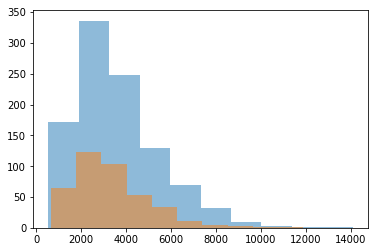

DescribeResult(nobs=1004, minmax=(541.14, 14082.8), mean=3613.5287151394423, variance=3537913.263575915, skewness=1.1902242714600775, kurtosis=2.0904573952796275)
DescribeResult(nobs=399, minmax=(652.35, 11886.6), mean=3342.3110776942353, variance=2760478.1861071275, skewness=1.2861309164437988, kurtosis=2.5836102920283714)


In [0]:
# Plot the histogram

plt.hist(usa_sales['sales'], alpha = .5)
plt.hist(uk_can_aus_sales['sales'], alpha = .5)
plt.show()

print(stats.describe(usa_sales['sales']))
print(stats.describe(uk_can_aus_sales['sales']))

In [0]:
# Conduct the t-test

stats.ttest_ind(usa_sales['sales'], uk_can_aus_sales['sales'])

Ttest_indResult(statistic=2.516320225403417, pvalue=0.011969721868344921)

In [0]:
# Confidence interval


def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(usa_sales['sales'], uk_can_aus_sales['sales']))

# What is the current average sales in these countries?

print(uk_can_aus_sales["sales"].mean())


The difference in means at the 95% confidence interval (two-tail) is between -471.5053726917114 and -70.92990219870254.
3342.3110776942353


## 5. Results

Based on a visual inspection, sales are close enough to normally distributed that I could proceed with the t-test. Based on a p-value of `0.01`, I reject the null that there is no significant difference in means. 

The 95% confidence interval suggests that the difference in the average sale between the US and other English-speaking countries is between \\$71 and \\$471. Currently, the average sale in these countries is $3,342. 



## 6. Discussion and recommendation

Sales are on average significantly higher in the US than in other English-speaking countries. However, the "lift" that would be achieved by exporting strategies could fall in a wide range. As a next step in the process, I will examine whether there are certain products sold in the US that may not be available in these other countries, then examine through A/B testing the results of introducing them to these markets. 

This makes for a non-risky, inexpensive way to follow up on the findings of this research.